In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math
import os
plt.rcParams['axes.grid'] = True # Turns grid lines on globally

In [2]:
path = os.getcwd()
files = os.listdir()
print(files)
data = pd.read_csv(path+'/'+'Lab9_mod_intial.csv',header = 0)
files

['Lab9_report_raw.csv', 'Lab9_analysis.ipynb', '.ipynb_checkpoints', 'Figure5-2.png', 'Figure5-1.png', '.~lock.Lab9_mod_intial.csv#', 'Figure5-3.png', '.~lock.Lab9_report_raw.csv#', 'Lab9_raw.csv', 'Lab9_mod_intial.csv']


['Lab9_report_raw.csv',
 'Lab9_analysis.ipynb',
 '.ipynb_checkpoints',
 'Figure5-2.png',
 'Figure5-1.png',
 '.~lock.Lab9_mod_intial.csv#',
 'Figure5-3.png',
 '.~lock.Lab9_report_raw.csv#',
 'Lab9_raw.csv',
 'Lab9_mod_intial.csv']

In [3]:
for i in range(4,12):
    data.loc[i,"DMM2"] /= 1000.
for j in range(len(data)):
    data.loc[j,"ratio"] = data.loc[j,"DMM2"]/data.loc[j,"DMM1"]

In [4]:
data.columns

Index(['FGOV', 'DMM1', 'DMM2', 'micPos', 'PP', 'Frequency ', 'Vzero', 'Pzero',
       'K[data sheet]', 'ratio'],
      dtype='object')

In [5]:
data

,FGOV,DMM1,DMM2,micPos,PP,Frequency,Vzero,Pzero,K[data sheet],ratio
0,2.88,5.00,1.9270,0.00,7.5,5.0,0.0,7.06,NaN,0.385400
1,NaN,5.00,1.6590,1.00,NaN,NaN,NaN,NaN,NaN,0.331800
2,NaN,5.01,1.3850,2.00,NaN,NaN,NaN,NaN,NaN,0.276447
3,NaN,5.01,1.1100,3.00,NaN,NaN,NaN,NaN,NaN,0.221557
4,NaN,5.01,0.8094,4.00,NaN,NaN,NaN,NaN,NaN,0.161557
5,NaN,5.01,0.5509,5.00,NaN,NaN,NaN,NaN,NaN,0.109960
6,NaN,5.01,0.2929,6.00,NaN,NaN,NaN,NaN,NaN,0.058463
7,NaN,5.01,0.0225,7.00,NaN,NaN,NaN,NaN,NaN,0.004491
8,NaN,5.01,0.0000,7.06,NaN,NaN,NaN,NaN,NaN,0.000000
9,NaN,5.01,0.2317,8.00,NaN,NaN,NaN,NaN,NaN,0.046248


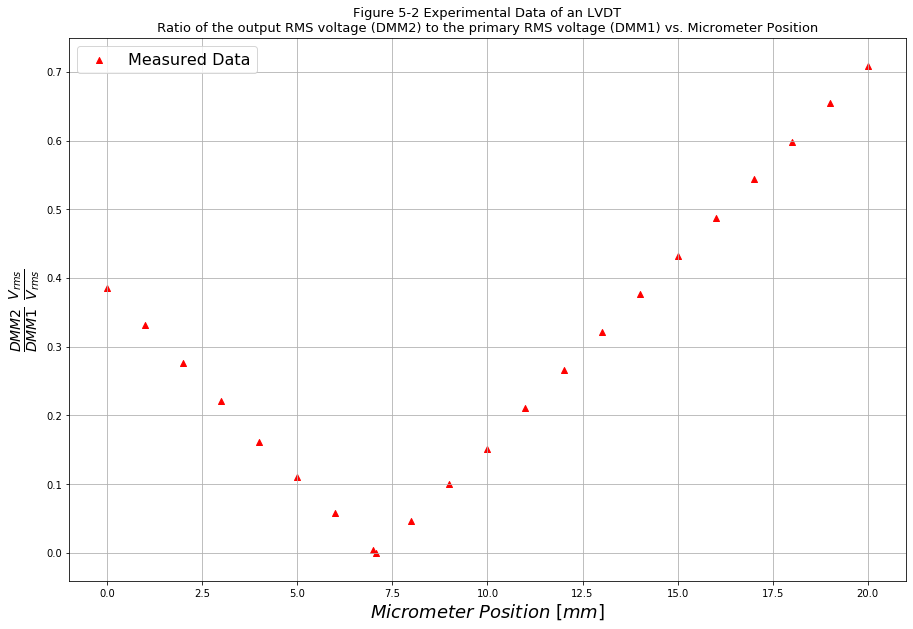

In [6]:
fig1,ax = plt.subplots(figsize = [15,10])
ax.scatter(data.micPos,data.ratio,color = 'red',marker = '^')
ax.set_xlabel(r'$Micrometer$ $Position$ $[mm]$',fontsize = 18)
ax.set_ylabel(r'$\frac {DMM2}{DMM1}$ $\frac{V_{rms}}{V_{rms}}$',fontsize = 20)
plotList = ['Measured Data']
ax.legend(plotList,loc = 'upper left',prop={'size': 16})
ax.set_title('Figure 5-2 Experimental Data of an LVDT\n Ratio of the output RMS voltage (DMM2)' \
             +' to the primary RMS voltage (DMM1) vs. Micrometer Position ',fontsize = 13)
fig1.savefig('Figure5-2.png')

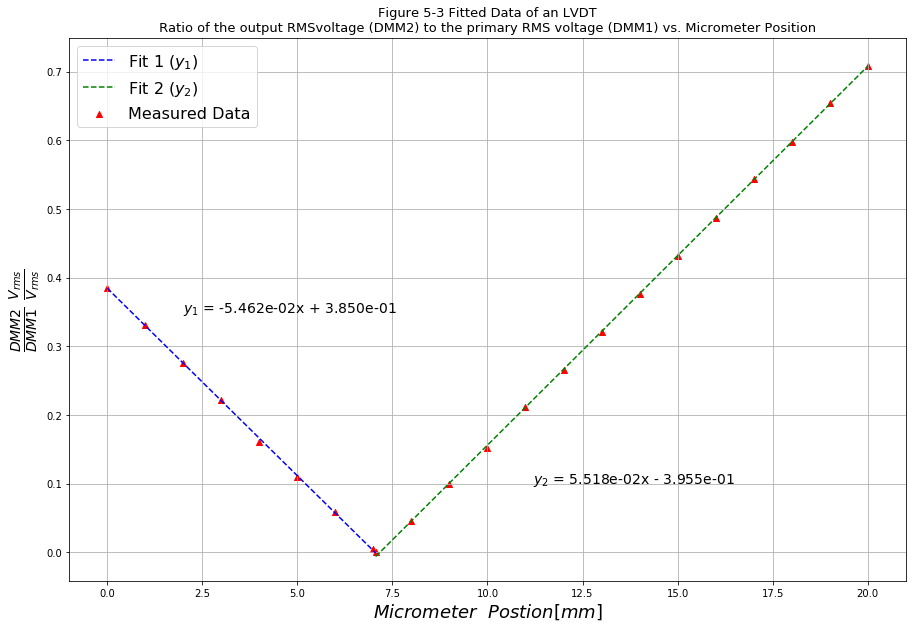

In [7]:
fig2,ax = plt.subplots(figsize = [15,10])
ax.scatter(data.micPos,data.ratio,color = 'red',marker = '^')
ax.set_xlabel(r'$Micrometer$  $Postion [mm]$',fontsize = 18)
ax.set_ylabel(r'$\frac {DMM2}{DMM1}$ $\frac{V_{rms}}{V_{rms}}$',fontsize=20)
p1 = np.polyfit(data.micPos[0:9],data.ratio[0:9],1)
fit1 = np.polyval(p1,data.micPos[0:9])
ax.plot(data.micPos[0:9],fit1,linestyle = '--',color = 'blue')
p2 = np.polyfit(data.micPos[8:22],data.ratio[8:22],1)
fit2 = np.polyval(p2,data.micPos[8:22])
ax.plot(data.micPos[8:22],fit2,linestyle = '--',color = 'green')
ax.set_title('Figure 5-3 Fitted Data of an LVDT\n Ratio of the output RMS' \
             +'voltage (DMM2) to the primary RMS voltage (DMM1) vs. Micrometer Position ',fontsize = 13)
txt1 = '$y_1$ = %.3ex'%p1[0]+' + %.3e'%p1[1]
ax.text(2,.35,txt1,fontsize = 14)
txt2 = '$y_2$ = %.3ex'%p2[0]+' - %.3e'%abs(p2[1])
ax.text(11.2,.1,txt2,fontsize = 14)
plotList = ['Fit 1 ($y_1$)','Fit 2 ($y_2$)','Measured Data']
ax.legend(plotList,loc = 'upper left',prop={'size': 16})
fig2.savefig('Figure5-3.png')

In [8]:
# Data Sheet Values
Range = 12.5 # [mm]
SS = 0.7 # [V/V]
K = SS/Range # [V/V/mm]
print(K)

0.055999999999999994


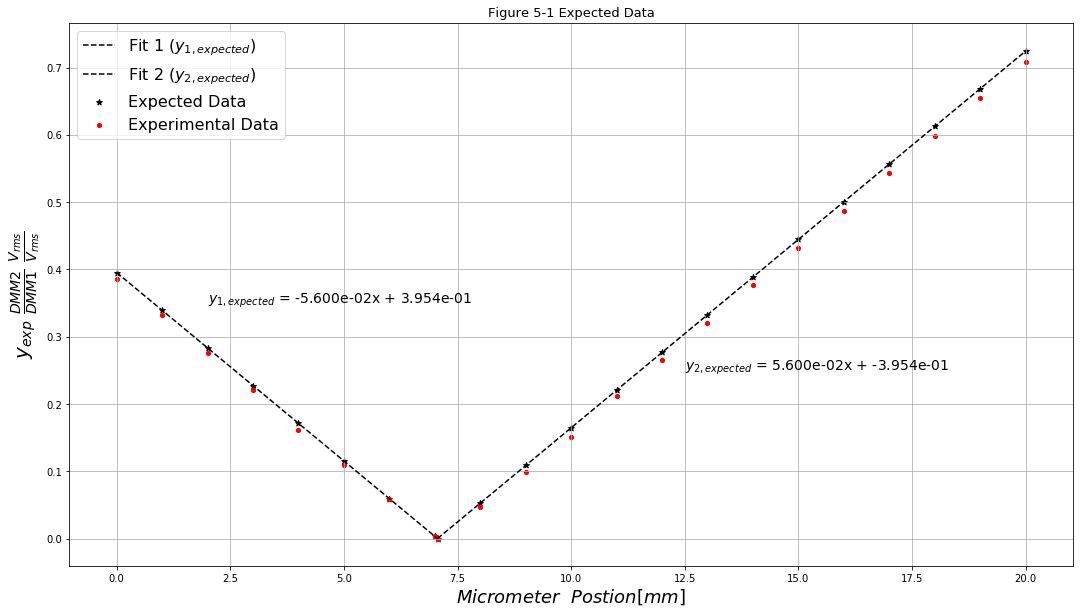

In [16]:
fig3,ax = plt.subplots(figsize = [18,10])
x = data.micPos
fudge = -0.3953599999999999-5.5511151231257827e-17
for i in range(len(data)):
    if i <= 8:
        data.loc[i,'Yexp'] = np.double(-K*data.loc[i,'micPos']-fudge)
    else:
        data.loc[i,'Yexp'] = np.double(K*data.loc[i,'micPos']+fudge)
#print(data)
    


ax.scatter(data.micPos,data.Yexp,color = 'black',marker = '*')
ax.scatter(data.micPos,data.ratio,color = 'red',marker = '.',s = 70)
ax.set_xlabel(r'$Micrometer$  $Postion [mm]$',fontsize = 18)
ax.set_ylabel(r'$y_{exp}$ $\frac {DMM2}{DMM1}$ $\frac{V_{rms}}{V_{rms}}$',fontsize=20)
p1 = np.polyfit(data.micPos[0:9],data.Yexp[0:9],1)
fit1 = np.polyval(p1,data.micPos[0:9])
ax.plot(data.micPos[0:9],fit1,linestyle = '--',color = 'black')
p2 = np.polyfit(data.micPos[8:22],data.Yexp[8:22],1)
fit2 = np.polyval(p2,data.micPos[8:22])
ax.plot(data.micPos[8:22],fit2,linestyle = '--',color = 'black')
ax.set_title('Figure 5-1 Expected Data',fontsize = 13)
txt1 = '$y_{1,expected}$ = %.3ex'%p1[0]+' + %.3e'%p1[1]
ax.text(2,.35,txt1,fontsize = 14)
txt1 = '$y_{2,expected}$ = %.3ex'%p2[0]+' + %.3e'%p2[1]
ax.text(12.5,.25,txt1,fontsize = 14)
plotList = ['Fit 1 ($y_{1,expected}$)','Fit 2 ($y_{2,expected}$)','Expected Data','Experimental Data']
ax.legend(plotList,loc = 'upper left',prop={'size': 16})
#fig2.savefig('Figure5-1.png')

In [20]:
data.micPos[8:22]

8      7.06
9      8.00
10     9.00
11    10.00
12    11.00
13    12.00
14    13.00
15    14.00
16    15.00
17    16.00
18    17.00
19    18.00
20    19.00
21    20.00
Name: micPos, dtype: float64

In [19]:
pd.set_option('precision', 3)
data.Yexp[8:22]


8     0.000
9     0.053
10    0.109
11    0.165
12    0.221
13    0.277
14    0.333
15    0.389
16    0.445
17    0.501
18    0.557
19    0.613
20    0.669
21    0.725
Name: Yexp, dtype: float64